<a href="https://colab.research.google.com/github/EmmaMills1002/knn/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/USA_cars_datasets (1).csv')
df = df[['price', 'year', 'mileage']]
df.isnull().sum()
print(df.shape)
print(df.head())

(2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
y = df['price']
X = df.loc[:, ['year', 'mileage']]
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return z
X = X.apply(maxmin)
print(X.head())
print(X.describe())

       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
k=3
model = KNeighborsRegressor(n_neighbors=k)
fitted_model = model.fit(X, y)

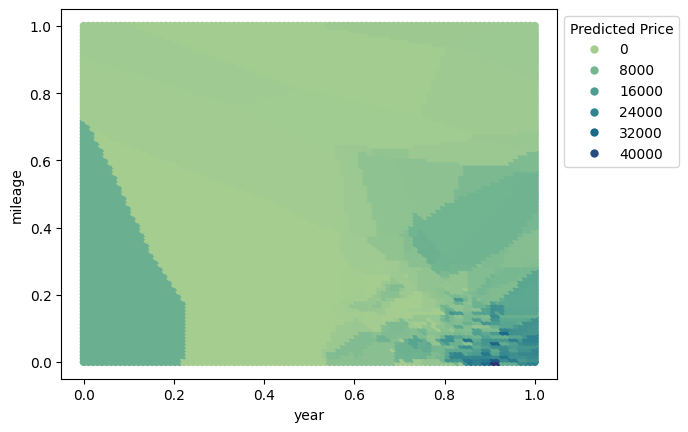

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors

x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
y_hat = fitted_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted Price'] = y_hat # Add new variable to the dataframe
# Create seaborn plot:
this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',
                            hue='Predicted Price', palette = 'crest', linewidth=0)
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
def statics(k=3,data=df): # This function replicates our previous work, with k as an input
    y = df['price'] # Create target variable vector
    X = df.loc[:,['year', 'mileage']] # Create feature matrix
    # Normalize:
    X = X.apply(maxmin)
    model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k=3
    fitted_model = model.fit(X,y) # Train the model on our data
    N_x = 100 # Coarseness of x variable
    N_y = 100 # Coarseness of y variable
    total = N_x*N_y # Total number of points to plot
    grid_x = np.linspace(0,1,N_x) # Create a grid of x values
    grid_y = np.linspace(0,1,N_y) # Create a grid of y values
    xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
    X = xs.reshape(total) # Turns pairs into vectors
    Y = ys.reshape(total) # Turns pairs into vectors
    x_hat = pd.DataFrame({'year':X,'mileage':Y}) # Create a dataframe of points to plot
    y_hat = fitted_model.predict(x_hat) # Fit the model to the points
    x_hat['Predicted Price'] = y_hat # Add new variable to the dataframe
    # Create seaborn plot:
    this_plot = sns.scatterplot(data=x_hat,x='year',y='mileage',
                                hue='Predicted Price',palette='crest',linewidth=0)
    sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

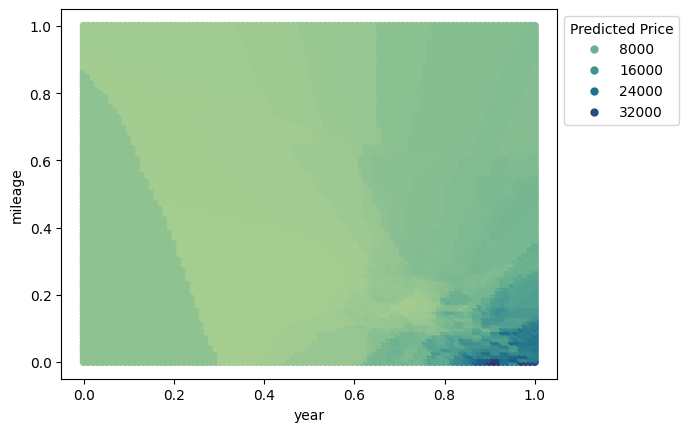

In [ ]:
statics(10)

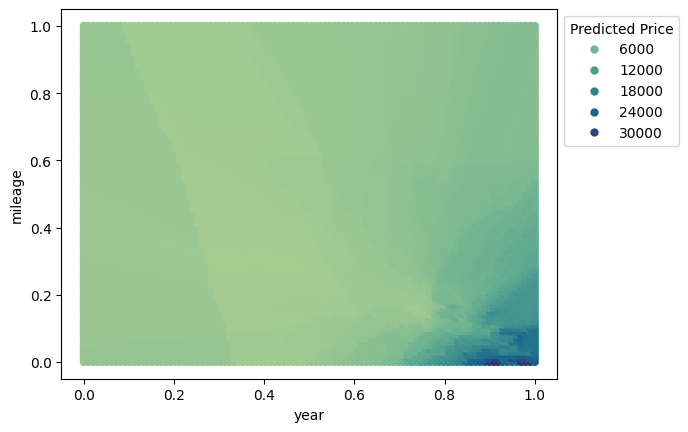

In [ ]:
statics(25)

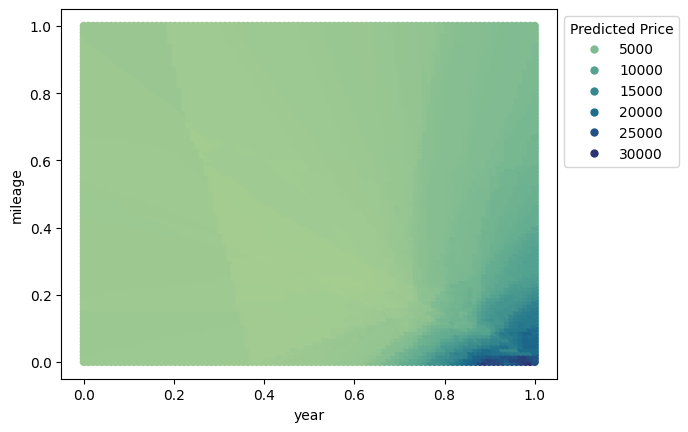

In [ ]:
statics(50)

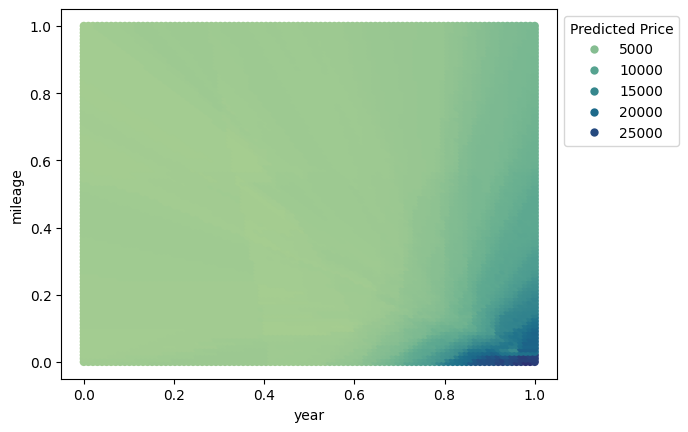

In [ ]:
statics(100)

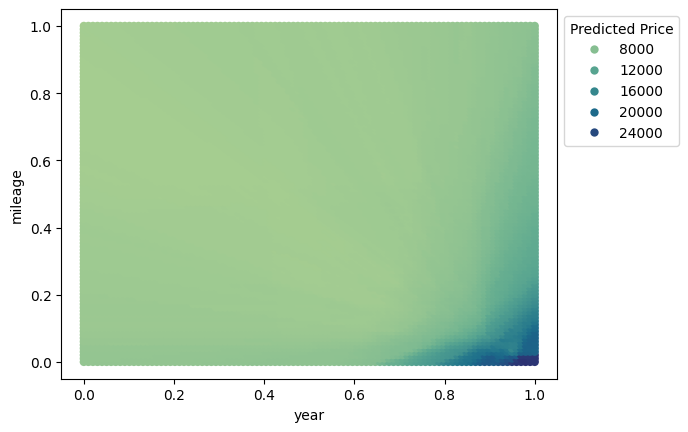

In [ ]:
statics(300)

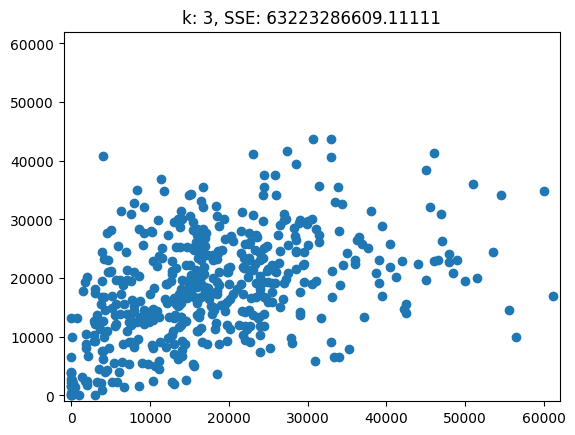

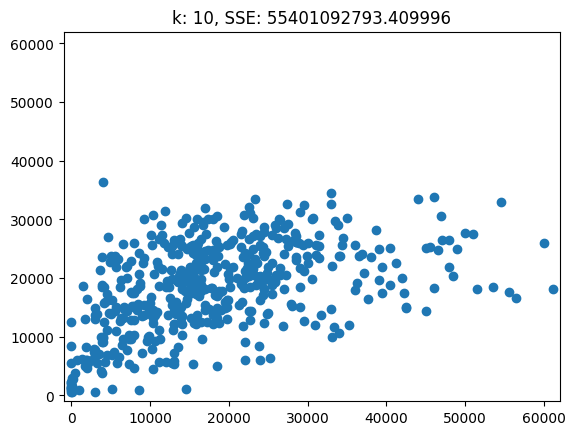

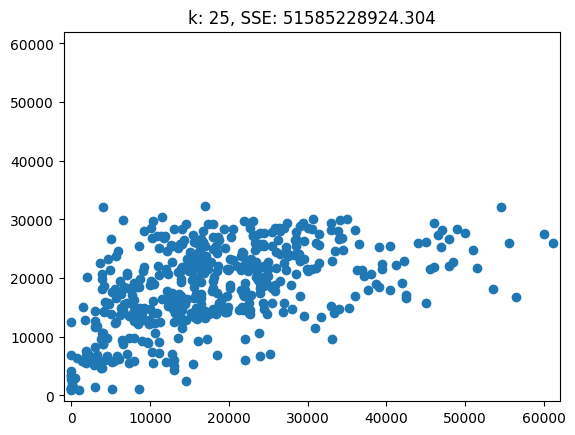

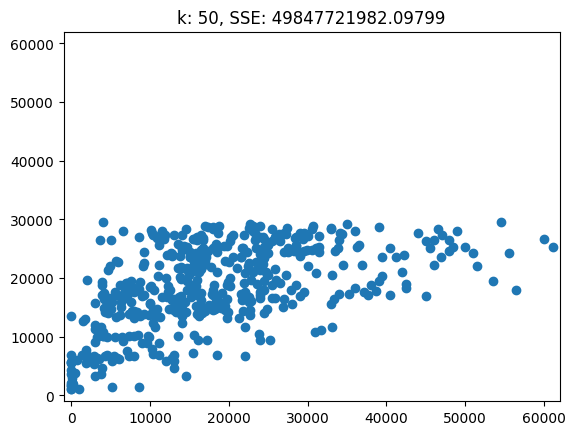

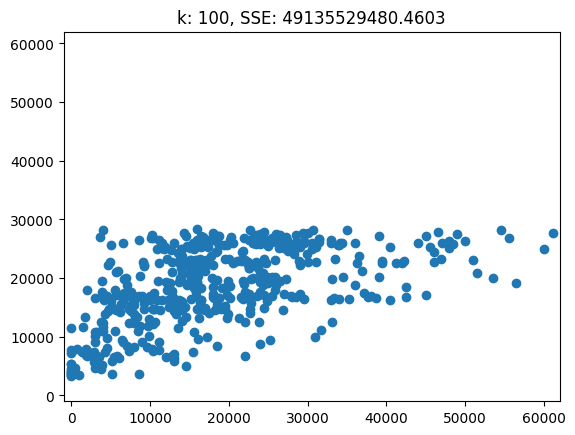

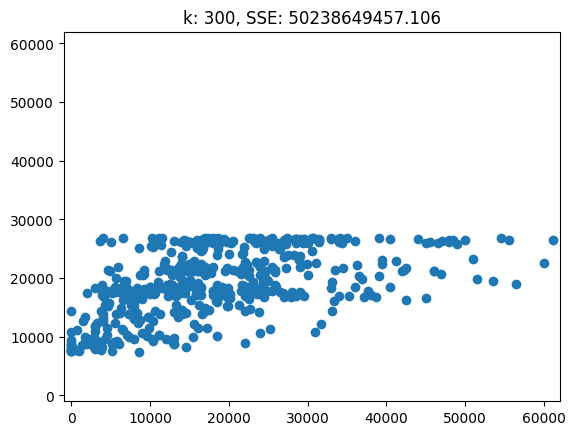

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

[77]


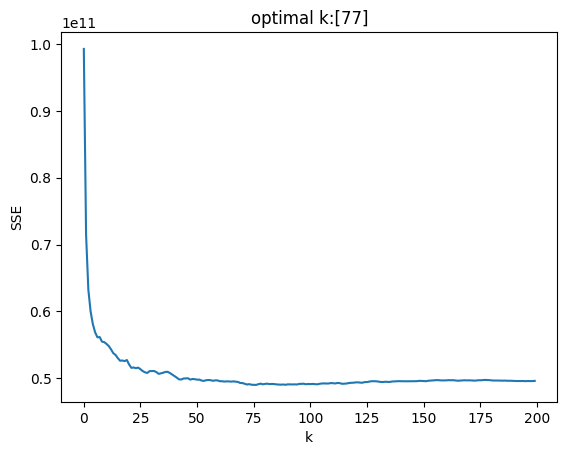

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_bar = 200
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

Because the optimal k equals 77, the model where k equals 300 is overfitting, and the models where k is 3, 10, and 25 are underfit. The closest output is where k is equal to 50 and 100. As k increases, the range of prediction lessens, meaning that the outlier values are depicted less in the model and predictions are more representative of average values.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [5]:
import pandas as pd
hearts = pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
print(hearts.isnull().sum())
hearts = hearts.drop('time', axis=1)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [7]:
hearts.corr() #Highest correlations are age, ejection_fraction, and serum_creatine

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [10]:
for var in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']:
    summary_table = hearts.groupby(var)['DEATH_EVENT'].mean()
    print(f"Summary table for {var}:\n{summary_table}\n")
# For diabetes, sex, and smoking, there is not a large difference between 0 and 1, meaning that they are not strong predictors
# However, anaemia and high_blood_pressure both have large differences, meaning that they are stronger predictors of death

Summary table for anaemia:
anaemia
0    0.294118
1    0.356589
Name: DEATH_EVENT, dtype: float64

Summary table for diabetes:
diabetes
0    0.321839
1    0.320000
Name: DEATH_EVENT, dtype: float64

Summary table for high_blood_pressure:
high_blood_pressure
0    0.293814
1    0.371429
Name: DEATH_EVENT, dtype: float64

Summary table for sex:
sex
0    0.323810
1    0.319588
Name: DEATH_EVENT, dtype: float64

Summary table for smoking:
smoking
0    0.325123
1    0.312500
Name: DEATH_EVENT, dtype: float64



In [15]:
y = hearts['DEATH_EVENT']
vars = ['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']
X = hearts.loc[:,vars]
def maxmin(z):
  u = (z-min(z))/(max(z)-min(z))
  return u
X = X.apply(maxmin)

In [17]:
import numpy as np
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

[9]


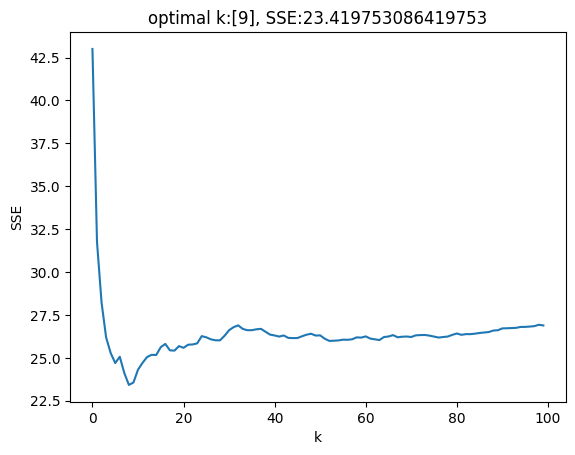

In [22]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

[42]


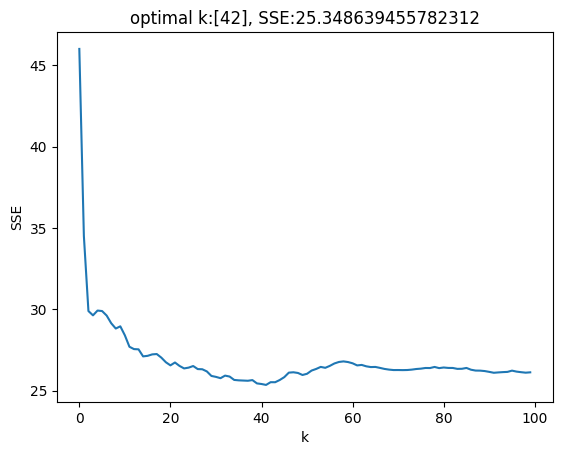

In [45]:
y = hearts['DEATH_EVENT']
vars = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
X = hearts.loc[:,vars]
def maxmin(z):
  u = (z-min(z))/(max(z)-min(z))
  return u
X = X.apply(maxmin)
import numpy as np
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)
import matplotlib.pyplot as plt
plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()
# It would be better to use less variables that are stronger predictors, as both our k and SSE is higher with more variables.
# This may seem counterintuitive, as having more variables sounds like it would make the prediction stronger. However, in this case, the opposite is true.